In [2]:
import os
import numpy as np
import pandas as pd
from scipy import misc
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [3]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
train=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Face Counting Challenge/train.csv')
train.head()

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [6]:
test=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Face Counting Challenge/test_Rj9YEaI.csv')
test.head()

,Name
0,10005.jpg
1,10009.jpg
2,10015.jpg
3,10022.jpg
4,10023.jpg


In [7]:
bbox=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Face Counting Challenge/bbox_train.csv')
bbox.head()

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

import os
import json
import time
import numpy as np
from PIL import Image
import torch
from tqdm import tqdm
import cv2


In [ ]:
temp=[]
facedetector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
for i in tqdm(range(test.shape[0])):
  # print(i)
  z='/content/gdrive/My Drive/Colab Notebooks/Face Counting Challenge/image_data/' + test['Name'][i]
  # print(z)
  img=cv2.imread(z,0)
  face=facedetector.detectMultiScale(img,
                                     scaleFactor=1.05,
                                     minNeighbors=3,
                                     minSize=(30,30)
                                     )
  temp.append(len(face))



100%|██████████| 2463/2463 [12:37<00:00,  3.25it/s]


In [ ]:
print(temp)

[2, 2, 1, 4, 4, 4, 3, 5, 3, 2, 0, 3, 1, 1, 0, 4, 2, 2, 1, 1, 1, 3, 2, 3, 3, 3, 1, 2, 0, 2, 2, 1, 6, 8, 3, 3, 1, 3, 5, 2, 2, 0, 1, 1, 3, 3, 3, 2, 2, 3, 3, 0, 3, 3, 7, 2, 1, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 2, 5, 5, 6, 6, 4, 3, 3, 3, 9, 1, 0, 2, 0, 2, 1, 2, 0, 2, 6, 7, 3, 0, 0, 2, 0, 0, 3, 4, 3, 14, 4, 5, 6, 4, 1, 5, 3, 6, 1, 3, 5, 2, 6, 1, 1, 5, 3, 0, 5, 0, 1, 2, 1, 2, 1, 4, 1, 2, 3, 1, 0, 1, 2, 2, 5, 1, 2, 3, 1, 5, 2, 0, 2, 2, 3, 4, 0, 0, 0, 0, 2, 4, 1, 2, 3, 5, 2, 1, 4, 1, 5, 2, 0, 4, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 3, 0, 1, 2, 2, 2, 0, 3, 3, 0, 4, 3, 2, 6, 3, 1, 1, 3, 1, 2, 1, 1, 2, 2, 3, 1, 1, 1, 5, 6, 0, 1, 2, 1, 2, 2, 4, 4, 3, 3, 1, 0, 2, 2, 1, 3, 4, 3, 4, 1, 3, 3, 4, 1, 6, 3, 4, 5, 2, 0, 2, 3, 3, 9, 3, 2, 3, 3, 0, 0, 1, 1, 1, 2, 3, 9, 1, 3, 2, 3, 2, 0, 3, 4, 1, 3, 3, 2, 1, 3, 2, 2, 3, 4, 3, 3, 3, 2, 0, 2, 2, 1, 2, 2, 7, 3, 3, 2, 2, 3, 4, 1, 5, 1, 2, 1, 1, 3, 1, 3, 3, 3, 2, 1, 2, 2, 3, 0, 4, 4, 2, 2, 1, 2, 0, 2, 2, 8, 1, 0, 3, 4, 3, 7, 7, 5, 4, 2, 1, 3, 3, 4, 0, 3, 8, 8, 2, 1, 5, 0, 3,

In [ ]:
submissions=pd.DataFrame({'Name':test['Name'], 'HeadCount':temp})
submissions.to_csv('sub.csv',index=False)

In [ ]:
submissions.head()

,Name,HeadCount
0,10005.jpg,2
1,10009.jpg,2
2,10015.jpg,1
3,10022.jpg,4
4,10023.jpg,4


In [ ]:
from google.colab import files
files.download("sub.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
### Putting boxes

In [ ]:
my=cv2.imread('/content/gdrive/My Drive/Colab Notebooks/Face Counting Challenge/image_data/' + '10004.jpg')
facedetector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
face=facedetector.detectMultiScale(my,
                                  scaleFactor=1.05,
                                  minNeighbors=3,
                                  minSize=(30,30)
                                  )
print('no of faces:', len(face))


no of faces: 1


[[237 154 114 114]]
Rectangle(xy=(237, 154), width=114, height=114, angle=0)


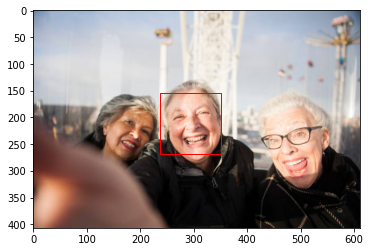

In [ ]:
fig,ax=plt.subplots(1)
im=cv2.cvtColor(my, cv2.COLOR_BGR2RGB)
ax.imshow(im)
for x,y,z,h in face:
  print(face)
  rect=patches.Rectangle((x,y),z,h, linewidth=1, edgecolor='r', facecolor='None')
  print(rect)
  ax.add_patch(rect)
plt.show()

In [9]:
img_dir='/content/gdrive/My Drive/Colab Notebooks/Face Counting Challenge/image_data/'

In [10]:
from PIL import Image
train_images=np.array(train.iloc[:,0])
test_images=np.array(test.iloc[:,0])
trainimagearr=[]
for i in tqdm(train_images):
  img=Image.open(img_dir+i).convert('L').resize((128,128))
  trainimagearr.append(np.array(img))



100%|██████████| 5733/5733 [1:06:48<00:00,  1.43it/s]


In [11]:
testimagearr=[]
for i in tqdm(test_images):
  img=Image.open(img_dir+i).convert('L').resize((128,128))
  testimagearr.append(np.array(img))



100%|██████████| 2463/2463 [29:32<00:00,  1.39it/s]


In [12]:
train_img=np.array(trainimagearr)
print(train_img.shape)
test_img=np.array(testimagearr)
print(test_img.shape)

(5733, 128, 128)
(2463, 128, 128)


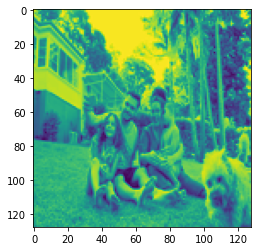

In [13]:
plt.imshow(train_img[0])

In [14]:
train_img=train_img.reshape(-1,128,128,1)
print(train_img.shape)
test_img=test_img.reshape(-1,128,128,1)
print(test_img.shape)


(5733, 128, 128, 1)
(2463, 128, 128, 1)


In [41]:
# mean, std = train_img.mean(), train_img.std()
train_img=train_img/train_img.max()
test_img=test_img/test_img.max()
# train_img=train_img-mean/std

# mean, std = test_img.mean(), test_img.std()
# test_img=test_img-mean/std
print(train_img.shape)

(5733, 128, 128, 1)


In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D, Activation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop, Adam, Adadelta


In [43]:
def baseline_model():
  nb_filters=5
  nb_conv=5
  image_size=128
  model=Sequential()

  model.add(Convolution2D(nb_filters,(nb_conv,nb_conv), input_shape=(image_size,image_size,1)))
  model.add(Activation('relu'))

  model.add(Convolution2D(nb_filters,(nb_conv,nb_conv)))
  model.add(Activation('relu'))

  model.add(Convolution2D(nb_filters,(nb_conv,nb_conv)))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Convolution2D(nb_filters*2,(nb_conv,nb_conv)))
  model.add(Activation('relu'))

  model.add(Convolution2D(nb_filters*2,(nb_conv,nb_conv)))
  model.add(Activation('relu')) 

  model.add(Convolution2D(nb_filters*2,(nb_conv,nb_conv)))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(1))
  model.add(Activation('linear'))

  model.compile(loss='mean_squared_error', optimizer=Adadelta())
  model.summary()
  return model






In [44]:
seed=7
np.random.seed(seed)


In [45]:
reg=KerasRegressor(build_fn=baseline_model,epochs=400,
                   batch_size=50, verbose=1)
reg.fit(train_img,train.HeadCount)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 124, 124, 5)       130       
_________________________________________________________________
activation_30 (Activation)   (None, 124, 124, 5)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 120, 5)       630       
_________________________________________________________________
activation_31 (Activation)   (None, 120, 120, 5)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 116, 116, 5)       630       
_________________________________________________________________
activation_32 (Activation)   (None, 116, 116, 5)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 116, 116, 5)      

In [46]:
prediction=reg.predict(test_img,verbose=1)


50/50 [==============================] - 1s 29ms/step


In [47]:
prediction

array([4.087053 , 5.1202025, 4.3988433, ..., 3.6997159, 4.6047773,
       6.208726 ], dtype=float32)

In [48]:
sub=pd.DataFrame({'Name':test.Name, 'HeadCount':prediction})
sub.sample(20)

,Name,HeadCount
2218,17379.jpg,5.809298
1010,13309.jpg,2.845524
2347,17827.jpg,2.092411
1260,14113.jpg,4.874450
1485,14909.jpg,4.039305
639,12067.jpg,5.090515
1902,16344.jpg,4.796994
2134,17075.jpg,4.188962
1464,14830.jpg,5.092769
1036,13386.jpg,3.036891


In [49]:
sub.to_csv('vision1.csv',index=False)

In [50]:
from google.colab import files
files.download("vision1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>